In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
coin = "bitcoin"

In [3]:
df = pd.read_csv(f'{coin}_dataset.csv')
df.columns

Index(['date', 'positive', 'negative', 'neutral', 'sentiment', 'price'], dtype='object')

In [4]:
df[:10]

,date,positive,negative,neutral,sentiment,price
0,2020-01-01,0.327065,0.117174,0.555761,0.377665,7199.8
1,2020-01-02,0.269417,0.132255,0.598327,0.229243,6967.0
2,2020-01-03,0.273025,0.142803,0.584172,0.222916,7343.1
3,2020-01-04,0.265981,0.127819,0.606200,0.227916,7376.8
4,2020-01-05,0.244098,0.130293,0.625609,0.181911,7372.5
5,2020-01-06,0.233380,0.140781,0.625839,0.147959,7759.1
6,2020-01-07,0.274342,0.113415,0.612244,0.262849,8155.7
7,2020-01-08,0.254697,0.129664,0.615639,0.203093,8059.6
8,2020-01-09,0.280792,0.126162,0.593046,0.260739,7842.4
9,2020-01-10,0.271592,0.152430,0.575978,0.206886,8187.1


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
 
class ClassificationAlgorithms():
    def __init__(self, X_train, X_test, Y_train, Y_test, **kwargs):
        
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        
        # self.algorithm = algorithm
        self.params = kwargs
        
#         if algorithm == 'rf':
#             self.randomForest(**kwargs)
#         elif algorithm == 'gb':
#             self.gradientBoosting(**kwargs)
#         elif algorithm == 'svm':
#             self.supportVectorMachine(**kwargs)

    def gradientBoosting(self, n_estimators=200, learning_rate=0.1, max_depth=1):
        clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=0).fit(self.X_train, self.Y_train)
        return self.calcScore(clf)

    def randomForest(self , n_estimators = 110):
        clf = RandomForestClassifier(n_estimators = 100)
        clf.fit(self.X_train, self.Y_train)
        return self.calcScore(clf)
#         pass
    
    def supportVectorMachine(self):
        clf = SVC() 
        clf.fit(self.X_train, self.Y_train)
        return self.calcScore(clf)
        
    
    def confusion_matrix(self, clf):
        cf_matrix = confusion_matrix(self.Y_test, clf.predict(self.X_test))
        labels = ['True Fall','False Rise','False Fall','True Rise']
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
        plt.show()
        


    def calcScore(self, clf):
        train_score = clf.score(self.X_train, self.Y_train)
        test_score  = clf.score(self.X_test, self.Y_test)
        # print(self.Y_test)
        print('Train score: {:.2f} | Test score: {:.2f}'.format(train_score, test_score))
        # self.confusion_matrix(clf)
        return train_score, test_score
    


In [6]:
total_data = {'gb':{'with':[], 'without':[]}, 'rf':{'with':[], 'without':[]}, 'svm':{'with':[], 'without':[]}}

In [7]:
for K in range(1, 8):
    print('K = {}'.format(K))
    X_with_sentiments = []
    X_without_sentiments = []
    Y = []

    for i in range(0, len(df) - K - 1):
        inp_with_sentiments = df[i : i + K][['positive', 'negative', 'neutral', 'price']].values
        inp_without_sentiments = df[i : i + K][['price']].values
        X_with_sentiments.append(inp_with_sentiments.ravel())
        X_without_sentiments.append(inp_without_sentiments.ravel())
        prev_price = df['price'][i + K - 1]
        curr_price = df['price'][i + K]
        output = int(curr_price > prev_price)
        Y.append(output)

    dataset_without_sentiments = train_test_split(X_without_sentiments, Y, test_size=0.2, random_state=42)
    print('Gradient Boosting (without sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_without_sentiments).gradientBoosting()
    total_data["gb"]["without"].append(val)
    
    dataset_with_sentiments = train_test_split(X_with_sentiments, Y, test_size=0.2, random_state=42)
    print('Gradient Boosting (with sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_with_sentiments).gradientBoosting()
    total_data["gb"]["with"].append(val)
    
    dataset_without_sentiments = train_test_split(X_without_sentiments, Y, test_size=0.2, random_state=42)
    print('Random Forest (without sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_without_sentiments).randomForest()
    total_data["rf"]["without"].append(val)
    
    dataset_without_sentiments = train_test_split(X_without_sentiments, Y, test_size=0.2, random_state=42)
    print('Random Forest (with sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_with_sentiments).randomForest()
    total_data["rf"]["with"].append(val)
    
    dataset_without_sentiments = train_test_split(X_without_sentiments, Y, test_size=0.2, random_state=42)
    print('Support Vector Machine (without sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_without_sentiments).supportVectorMachine()
    total_data["svm"]["without"].append(val)
    
    dataset_without_sentiments = train_test_split(X_without_sentiments, Y, test_size=0.2, random_state=42)
    print('Support Vector Machine (with sentiments, K = {})'.format(K))
    val = ClassificationAlgorithms(*dataset_with_sentiments).supportVectorMachine()
    total_data["svm"]["with"].append(val)
    
    print('### DONE ###\n\n')

K = 1
Gradient Boosting (without sentiments, K = 1)
Train score: 0.63 | Test score: 0.51
Gradient Boosting (with sentiments, K = 1)
Train score: 0.69 | Test score: 0.50
Random Forest (without sentiments, K = 1)
Train score: 1.00 | Test score: 0.46
Random Forest (with sentiments, K = 1)
Train score: 1.00 | Test score: 0.50
Support Vector Machine (without sentiments, K = 1)
Train score: 0.57 | Test score: 0.47
Support Vector Machine (with sentiments, K = 1)
Train score: 0.56 | Test score: 0.50
### DONE ###


K = 2
Gradient Boosting (without sentiments, K = 2)
Train score: 0.62 | Test score: 0.43
Gradient Boosting (with sentiments, K = 2)
Train score: 0.69 | Test score: 0.55
Random Forest (without sentiments, K = 2)
Train score: 1.00 | Test score: 0.51
Random Forest (with sentiments, K = 2)
Train score: 1.00 | Test score: 0.53
Support Vector Machine (without sentiments, K = 2)
Train score: 0.55 | Test score: 0.56
Support Vector Machine (with sentiments, K = 2)
Train score: 0.55 | Test sco

In [8]:
total_data

{'gb': {'with': [(0.6850574712643678, 0.5045871559633027),
   (0.6935483870967742, 0.5504587155963303),
   (0.7228637413394919, 0.5779816513761468),
   (0.7268518518518519, 0.44036697247706424),
   (0.7592592592592593, 0.5092592592592593),
   (0.7331786542923434, 0.4537037037037037),
   (0.7790697674418605, 0.6018518518518519)],
  'without': [(0.6275862068965518, 0.5137614678899083),
   (0.6221198156682027, 0.43119266055045874),
   (0.6466512702078522, 0.6146788990825688),
   (0.6504629629629629, 0.5412844036697247),
   (0.6689814814814815, 0.5833333333333334),
   (0.6589327146171694, 0.5),
   (0.6651162790697674, 0.49074074074074076)]},
 'rf': {'with': [(1.0, 0.5045871559633027),
   (1.0, 0.5321100917431193),
   (1.0, 0.48623853211009177),
   (1.0, 0.45871559633027525),
   (1.0, 0.4537037037037037),
   (1.0, 0.4537037037037037),
   (1.0, 0.5370370370370371)],
  'without': [(1.0, 0.45871559633027525),
   (1.0, 0.5137614678899083),
   (1.0, 0.5596330275229358),
   (1.0, 0.53211009174311

In [9]:
model = 'rf'

In [10]:
train_scores_with = [i[0] for i in total_data[model]['with']]
train_scores_without = [i[0] for i in total_data[model]['without']]
test_scores_with = [i[1] for i in total_data[model]['with']]
test_scores_without = [i[1] for i in total_data[model]['without']]
k_array = [i for i in range(1,8)]

In [11]:
data_preproc = pd.DataFrame({
    'days': k_array, 
    'train_with_sentiments': train_scores_with, 
    'train_without_sentiments': train_scores_without,
    'test_with_sentiments': test_scores_with,
    'test_without_sentiments': test_scores_without})

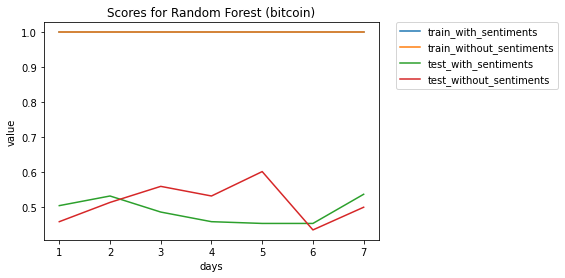

In [12]:
sns.lineplot(x='days', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['days']))
plt.title(f'Scores for Random Forest ({coin})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)